In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [76]:
df= pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Data Cleaning

In [78]:
df.shape

(2126, 14)

In [79]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [80]:
# check missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

## Handle missing values appropriately.

In [84]:
# lets fill all the missing values with median of each colums
df1= df.fillna(df.median())
df1.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [85]:
#now lets check the missing values
df1.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [90]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [92]:
#lets check the data types of all the colums.

print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [184]:
x=df1['FM'].apply(lambda x:str(x).isdigit())
x

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: FM, Length: 2126, dtype: bool

In [186]:
## Convert a column to numeric if it has numerical values stored as strings

df['LB'] = pd.to_numeric(df['LB'], errors='coerce')  
df['LB']

0       120.000000
1       132.000000
2       133.000000
3       134.000000
4       131.948232
           ...    
2121    140.000000
2122    140.000000
2123    140.000000
2124    140.000000
2125    142.000000
Name: LB, Length: 2126, dtype: float64

In [188]:
## Convert a column to numeric if it has numerical values stored as strings

df['AC'] = pd.to_numeric(df['AC'], errors='coerce')  
df['AC']

0       0.000000
1       0.006380
2       0.003322
3       0.002561
4       0.006515
          ...   
2121    0.000000
2122    0.000775
2123    0.000980
2124    0.000679
2125    0.001616
Name: AC, Length: 2126, dtype: float64

In [190]:
is_integer_like = df['FM'].apply(lambda x: str(x).isdigit())
print(is_integer_like)
print(df[is_integer_like])

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: FM, Length: 2126, dtype: bool
Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []


In [140]:
# there is no interger value exists in string format.

## Detect outleiers

In [143]:
# to detect outliers , we need to use,
#1. IQR--Inter quantile range

In [192]:
#lets calculate z-scores for all numeric columns
numeric_cols=df1.select_dtypes(include=np.number)
numeric_cols

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [196]:
# Step 1: Calculate the first (Q1) and third quartiles (Q3) and the Interquartile Range (IQR)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outliers as values outside 1.5*IQR
outliers_iqr = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the outliers
print("Outliers detected using IQR:\n", outliers_iqr)

Outliers detected using IQR:
          LB        AC        FM        UC        DL   DS        DP  ASTV  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  73.0   
3     134.0  0.002561  0.000000  0.007742  0.002561  0.0  0.000000  16.0   
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.0   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.0   
7     122.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  83.0   
...     ...       ...       ...       ...       ...  ...       ...   ...   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.000000  79.0   
2122  140.0  0.000775  0.000000  0.006979  0.000000  0.0  0.000000  78.0   
2123  140.0  0.000980  0.000000  0.006863  0.000000  0.0  0.000000  79.0   
2124  140.0  0.000679  0.000000  0.006110  0.000000  0.0  0.000000  78.0   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.000000  74.0   

      MSTV       ALTV  MLTV       Width  Tendency       N

# Statistical summary

In [202]:
# Statistical summary of the dataset
summary = df1.describe()
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
# mean and standard deviation of all columns are shown above.
# we will calculate median and standard deviation.

In [204]:
# Additional statistics
median = df1.median()
median

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [217]:
# interquantile range
iqr= df1.quantile(0.75) - df1.quantile(0.25)
iqr

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

# Data Visualization

### 1.Create histograms or boxplots to visualize the distributions of various numerical variables

## boxplot

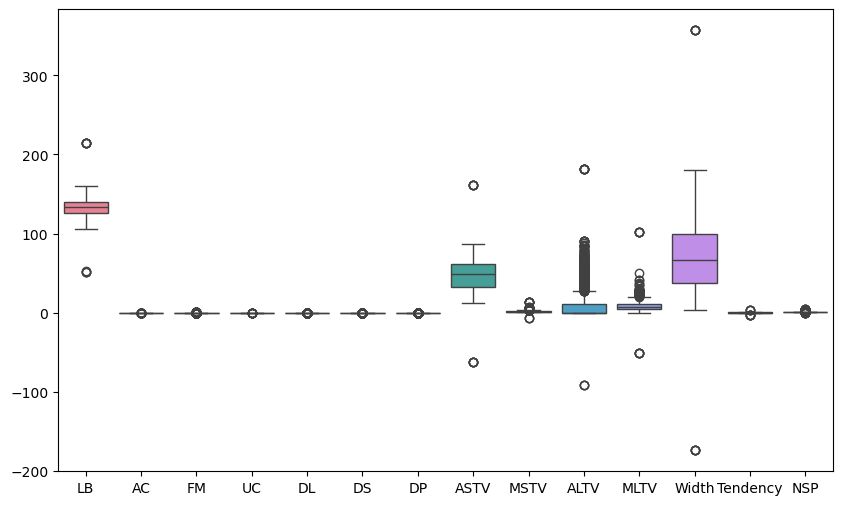

In [248]:
# Create boxplot for each numeric column to visualize outliers
# Boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.show()

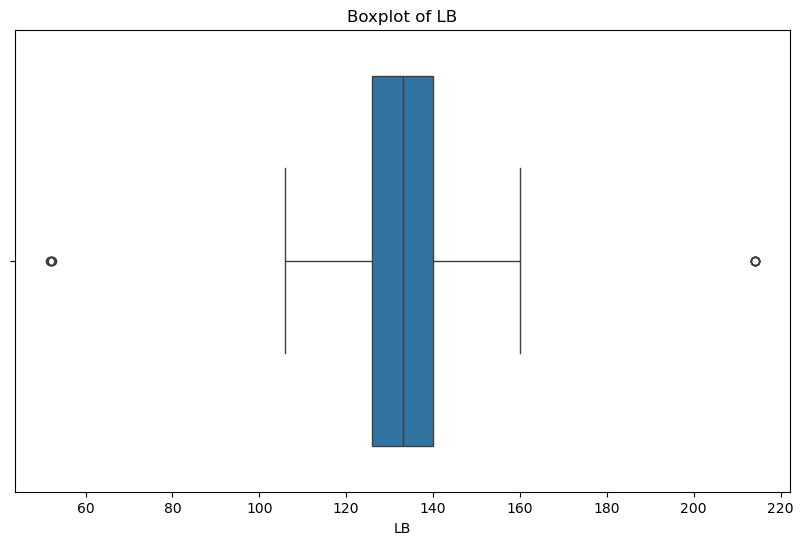

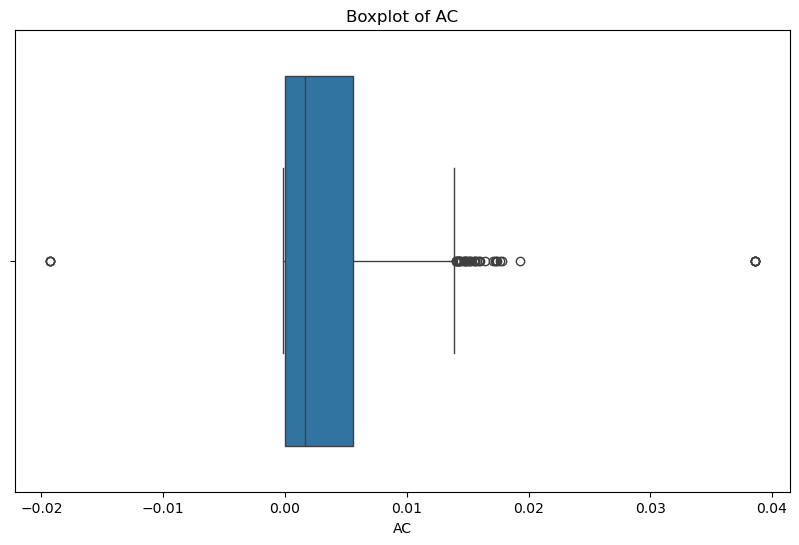

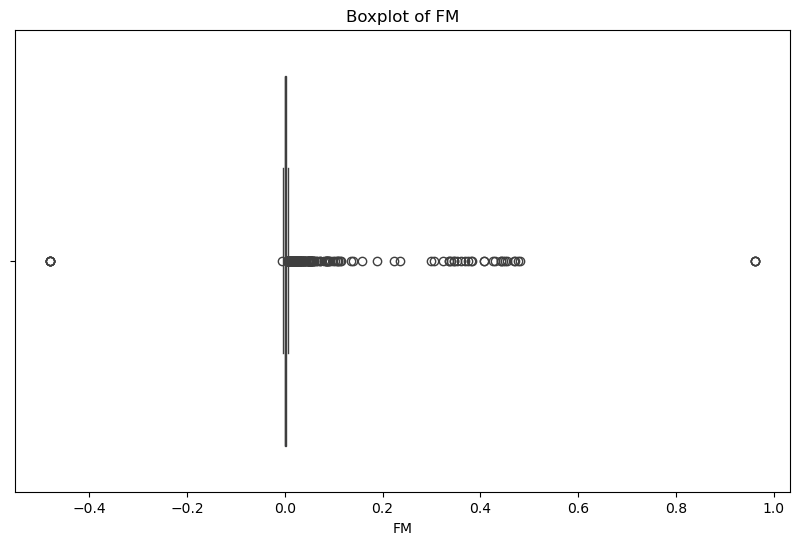

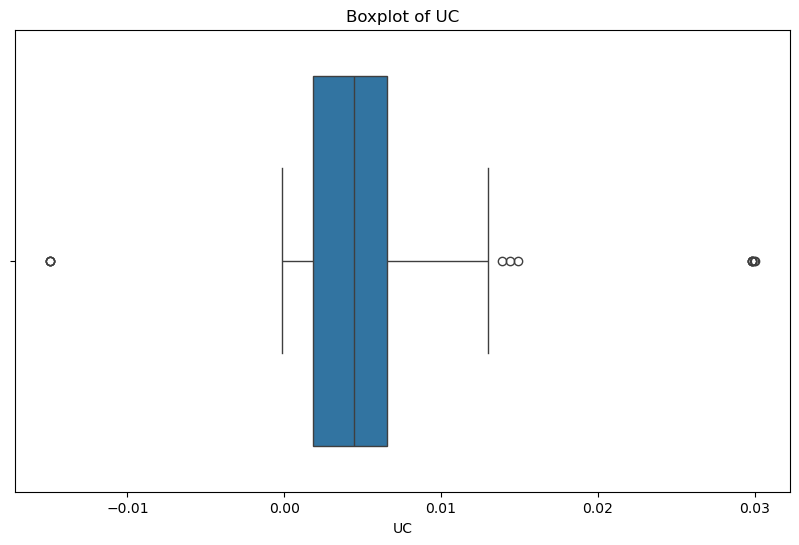

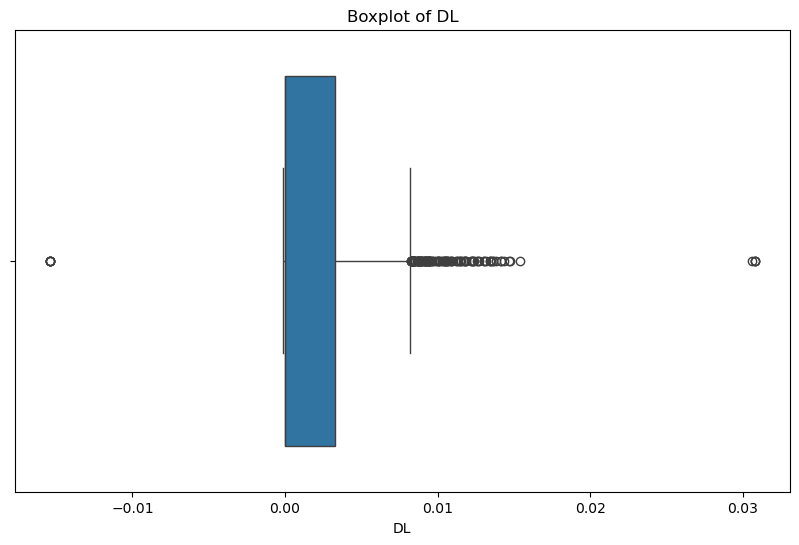

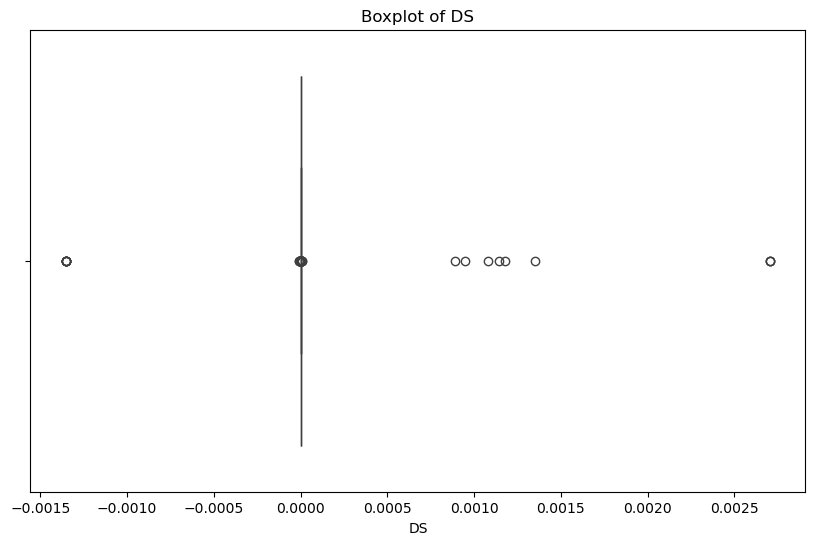

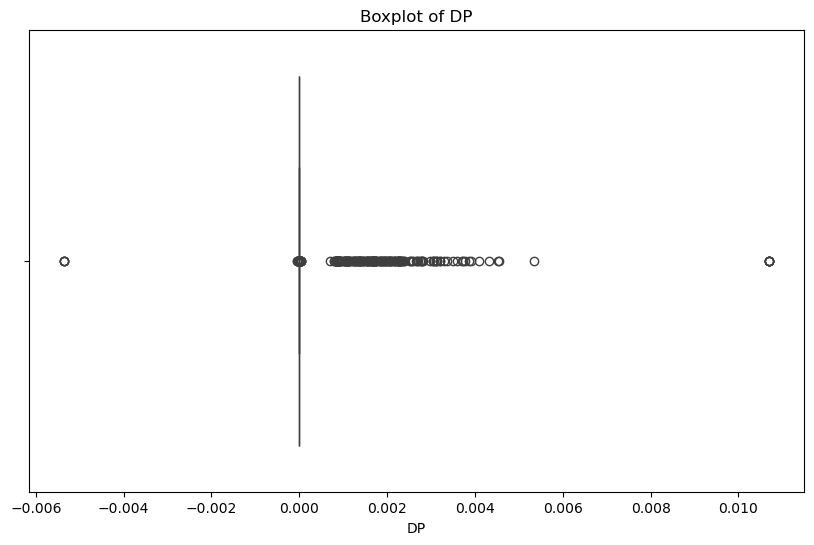

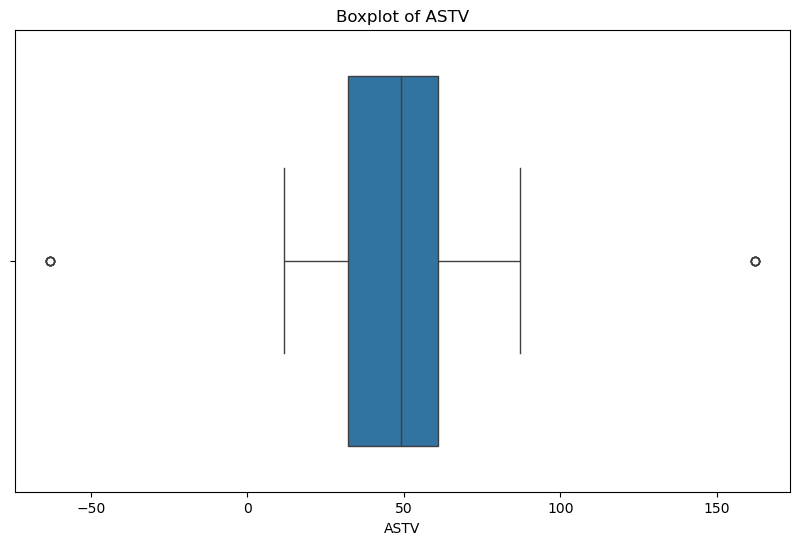

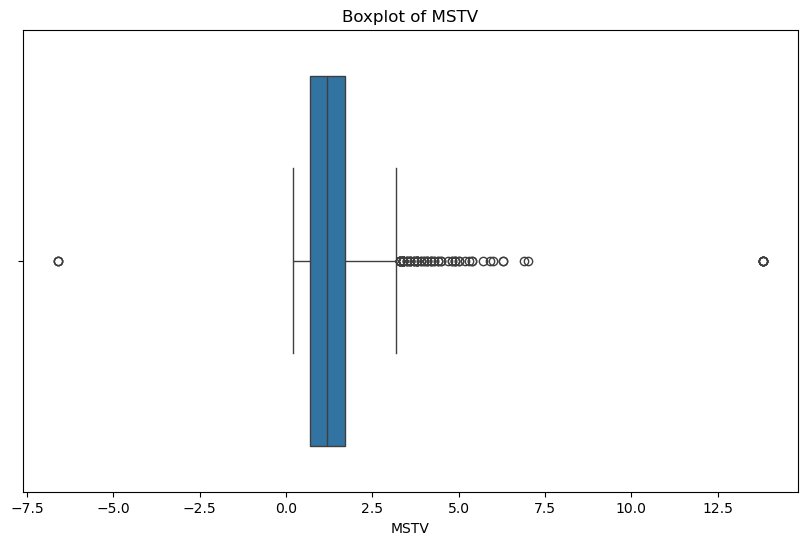

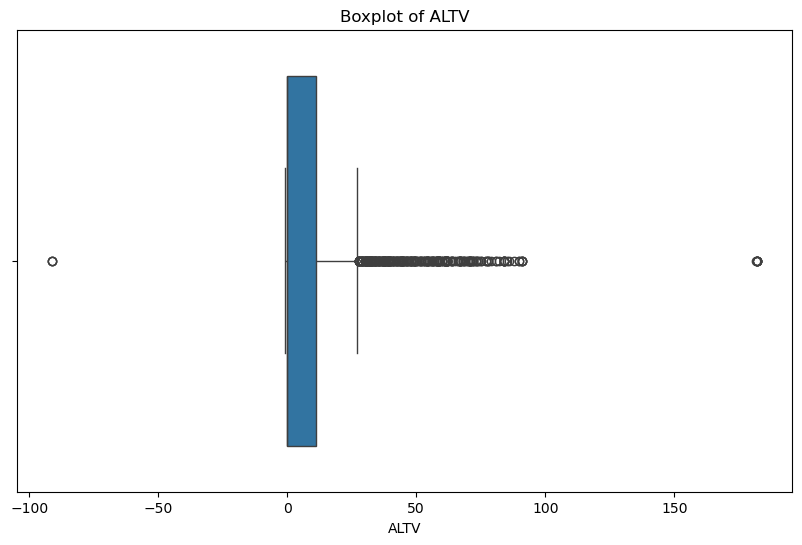

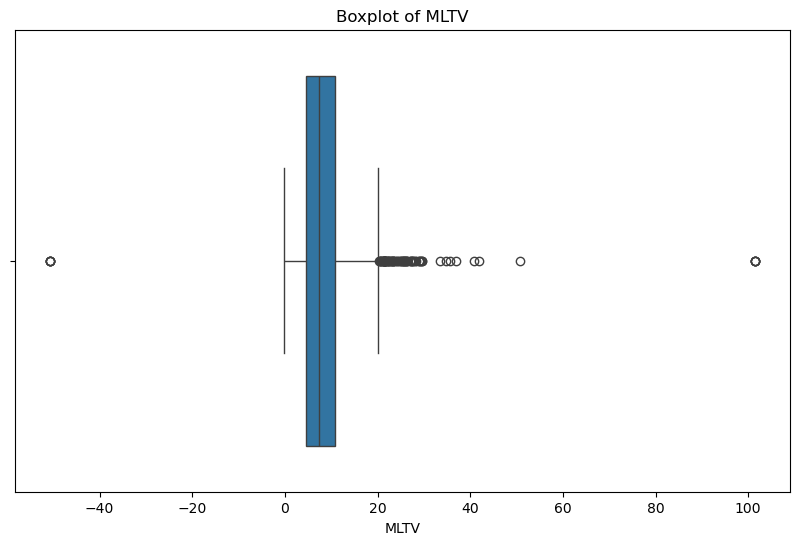

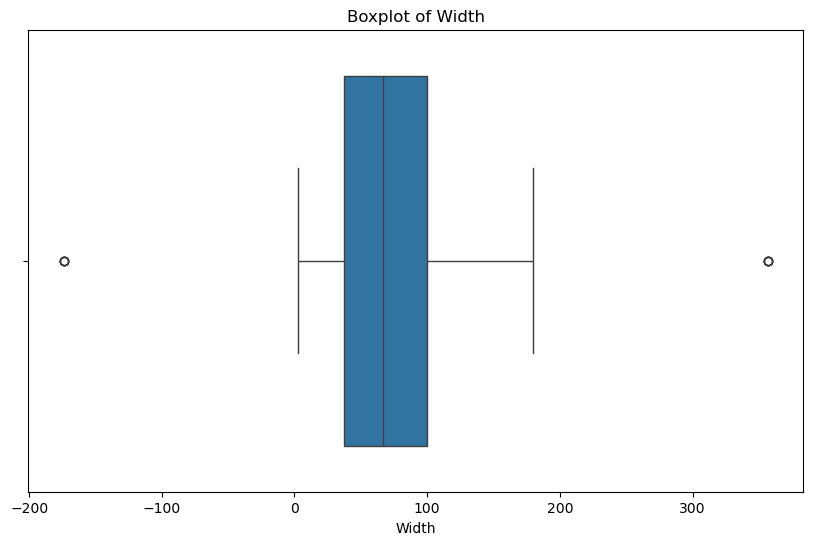

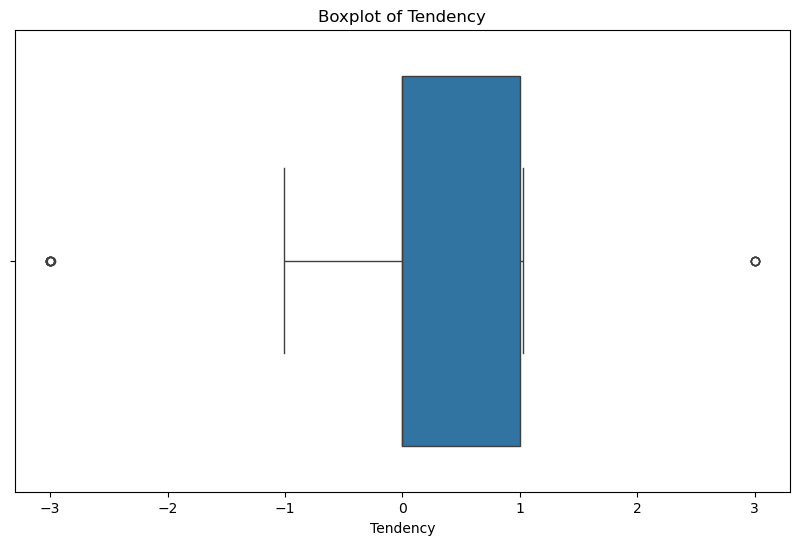

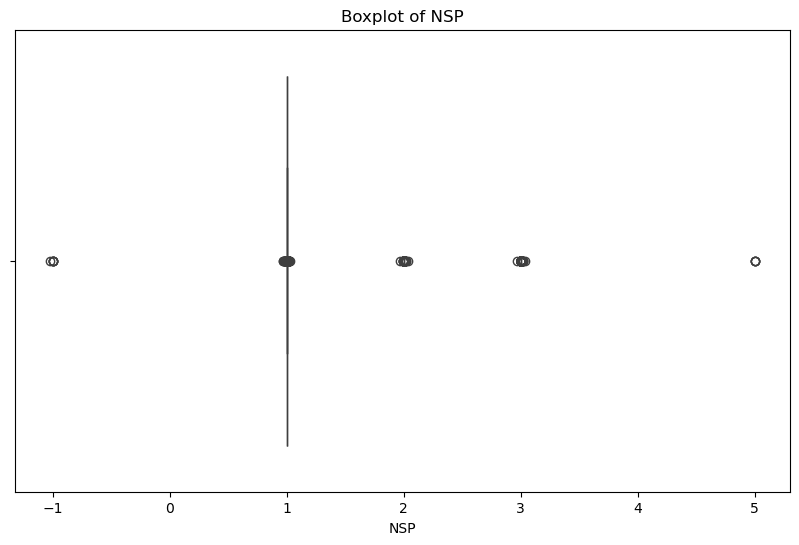

In [409]:
# 2. Create boxplots for numerical variables
for col in df1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## Histogram

In [ ]:
# I did histogram in 3 ways.

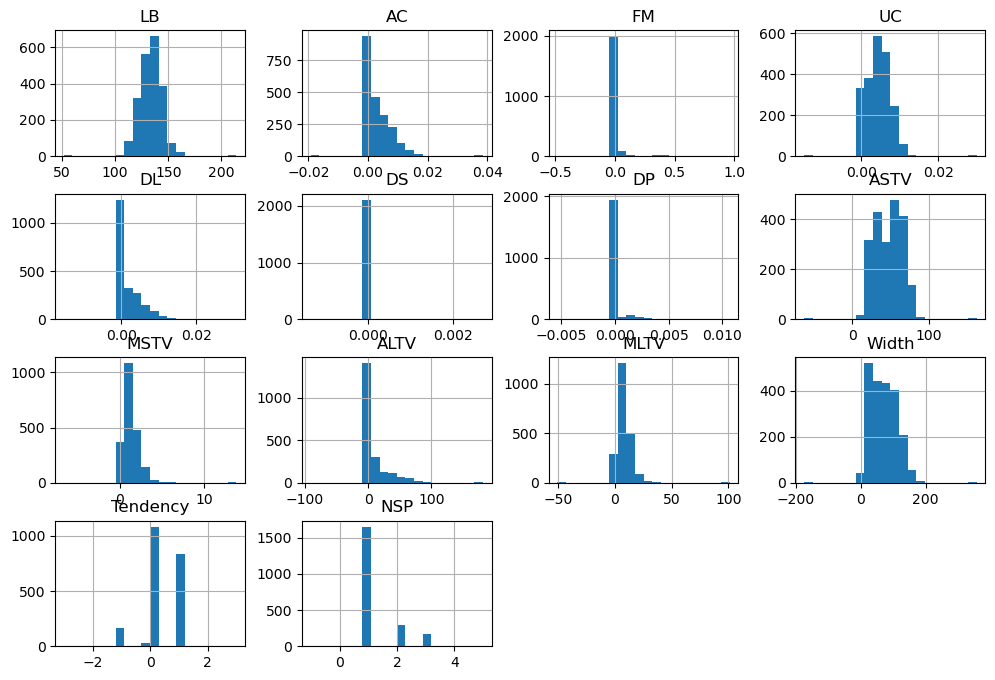

In [247]:
# Histograms for numerical variables
df1.hist(figsize=(12, 8), bins=20)
plt.show()

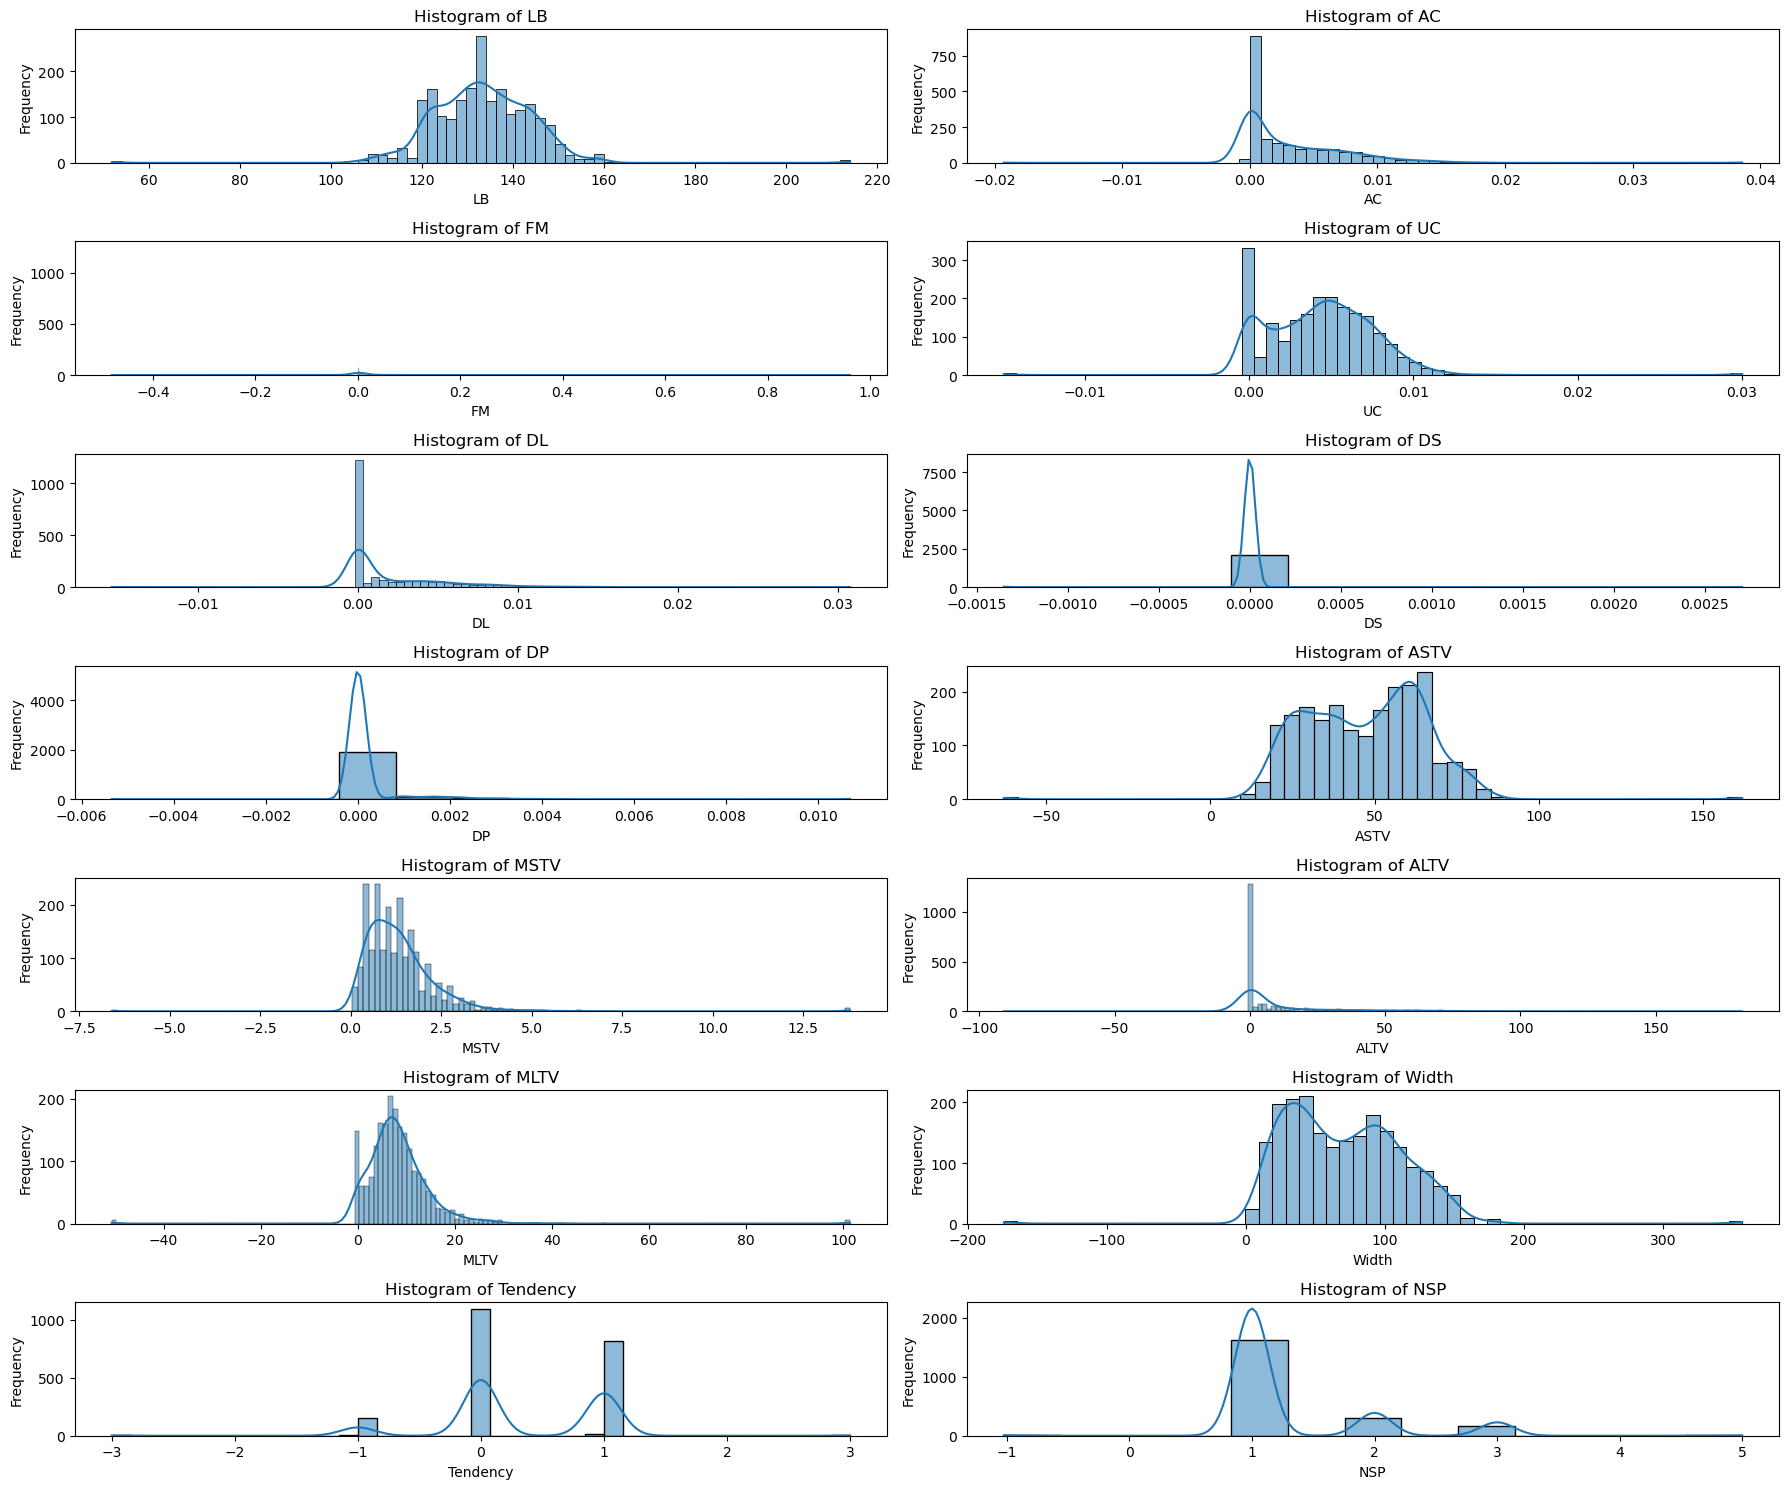

In [266]:
plt.figure(figsize=(18, 15))

# Histograms for each numerical column
for i, column in enumerate(df1, 1):
    plt.subplot(7, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


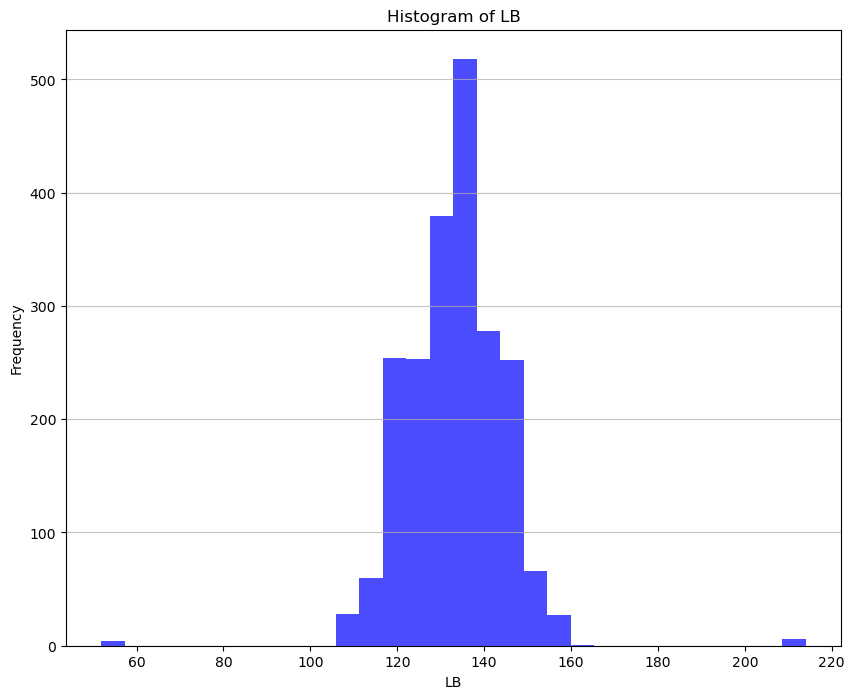

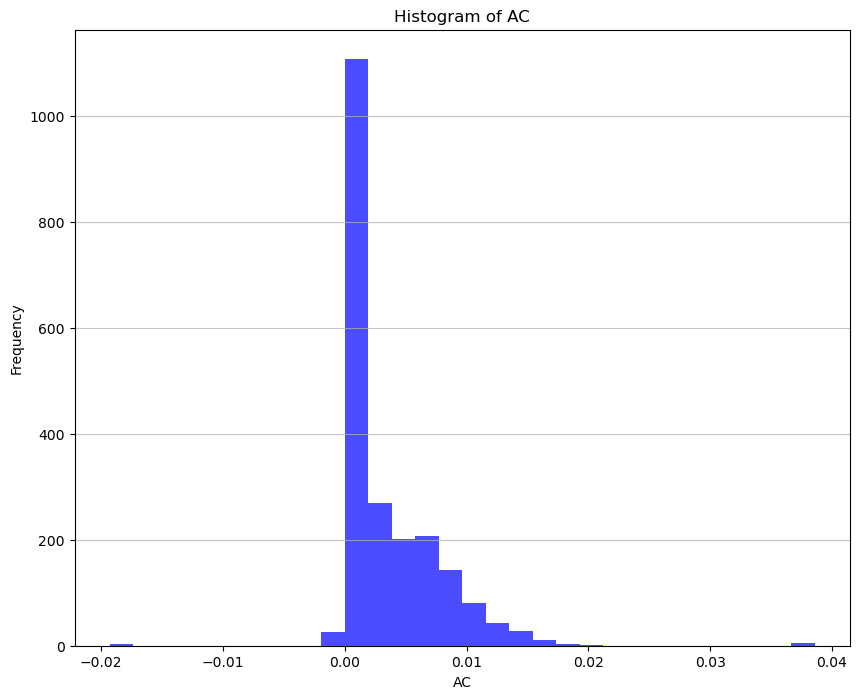

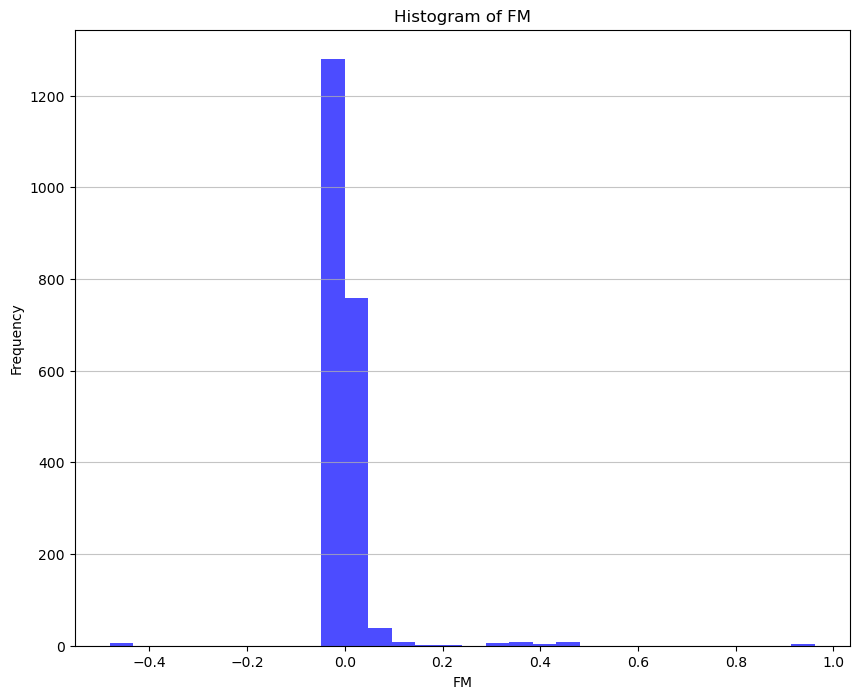

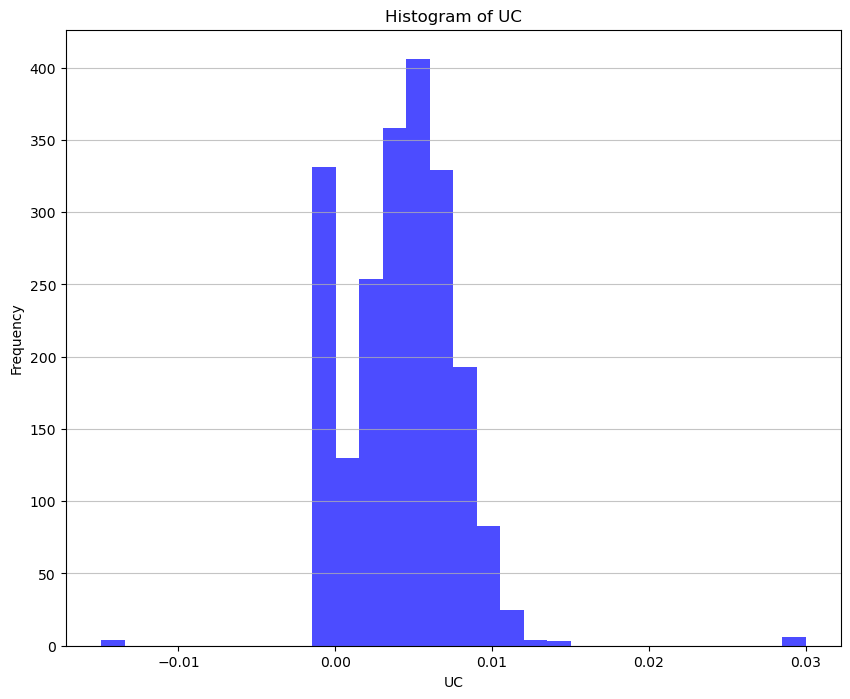

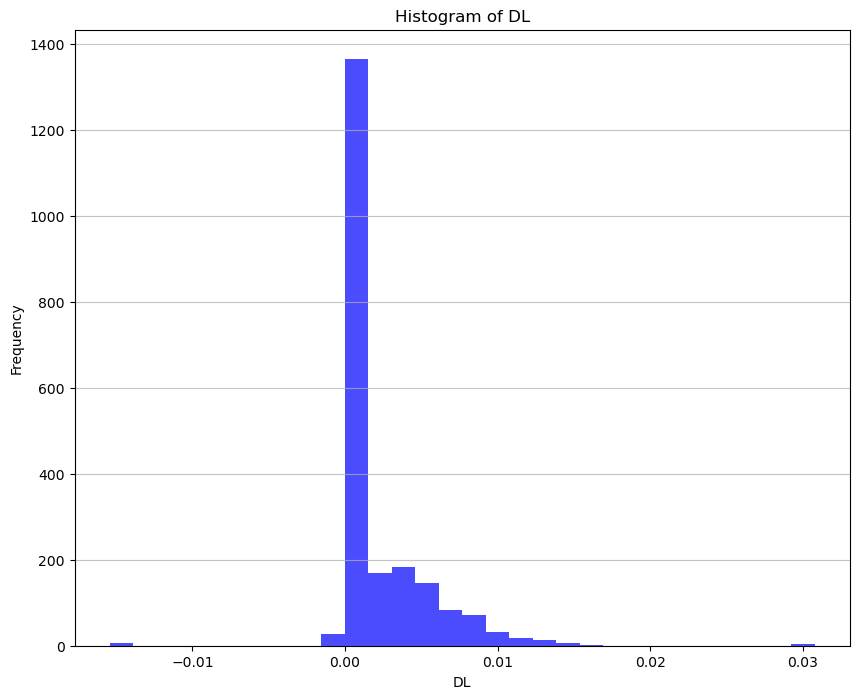

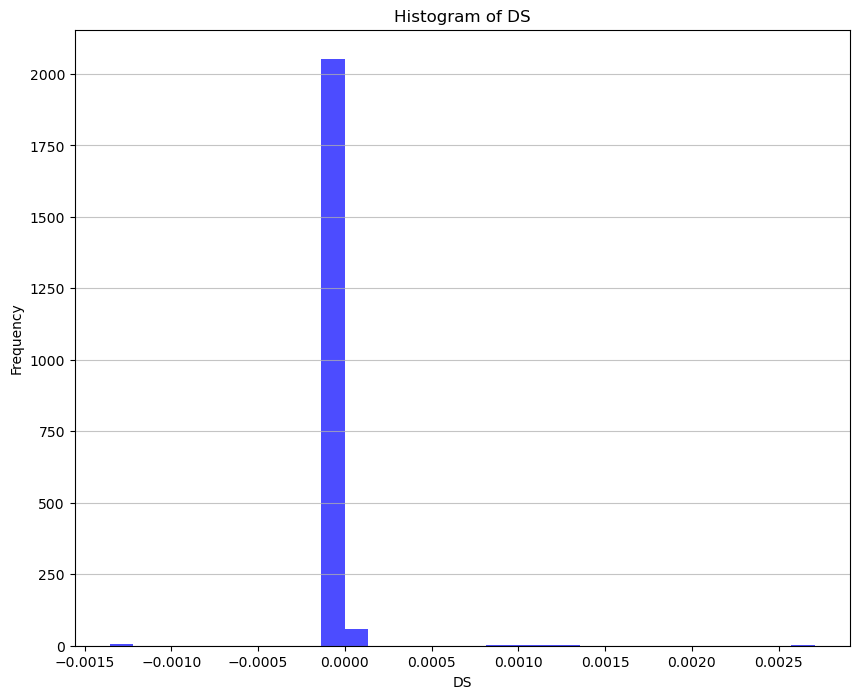

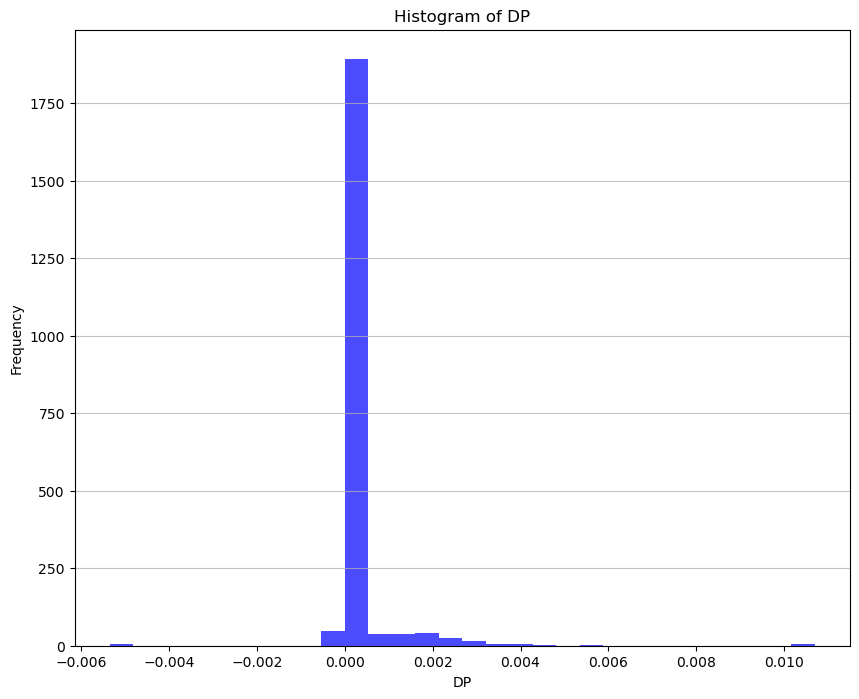

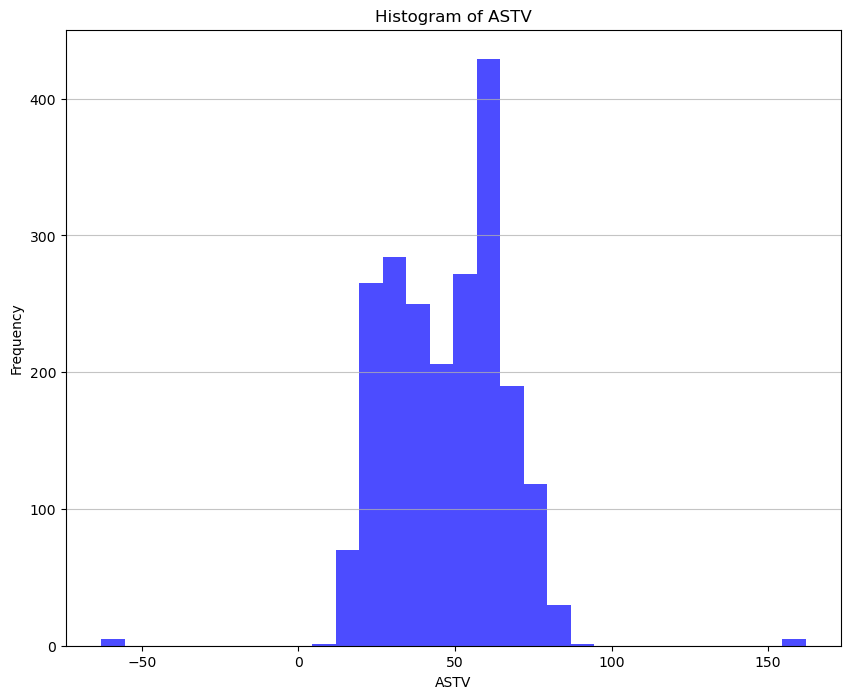

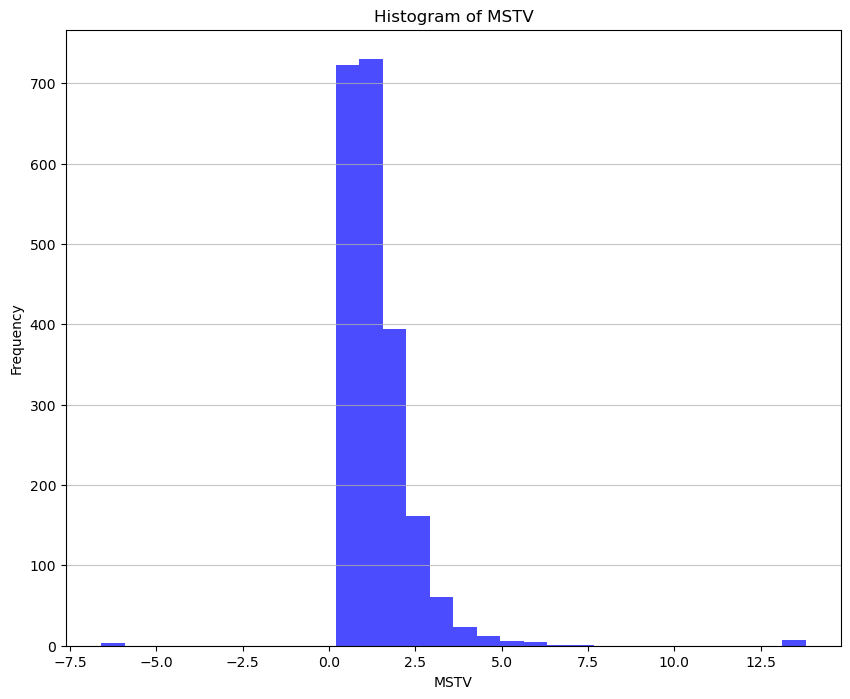

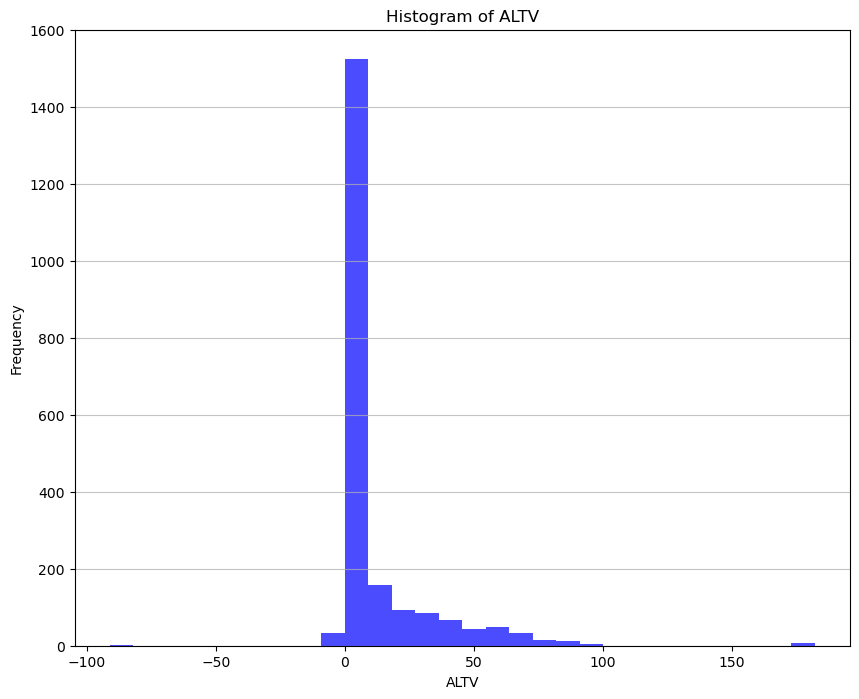

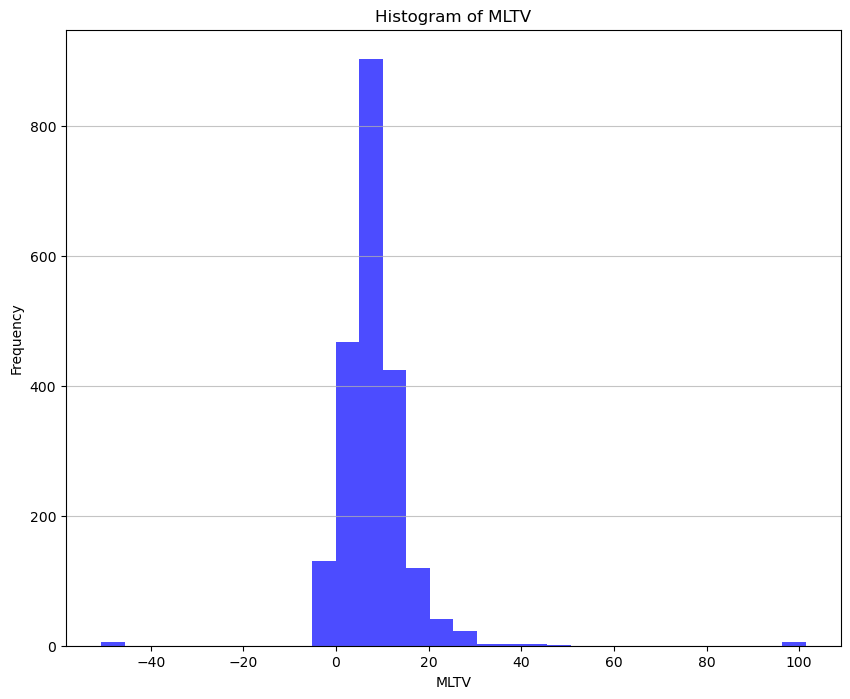

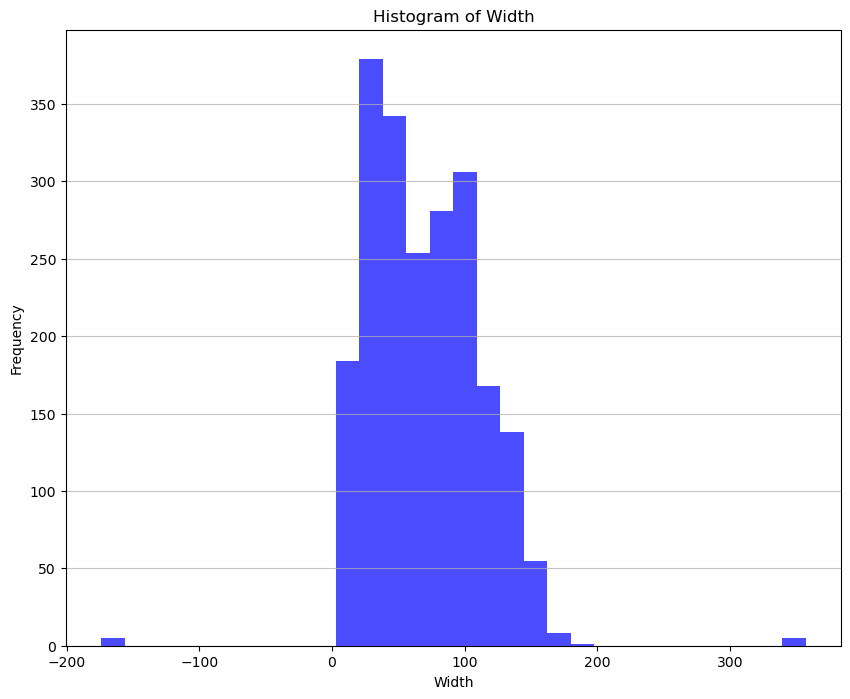

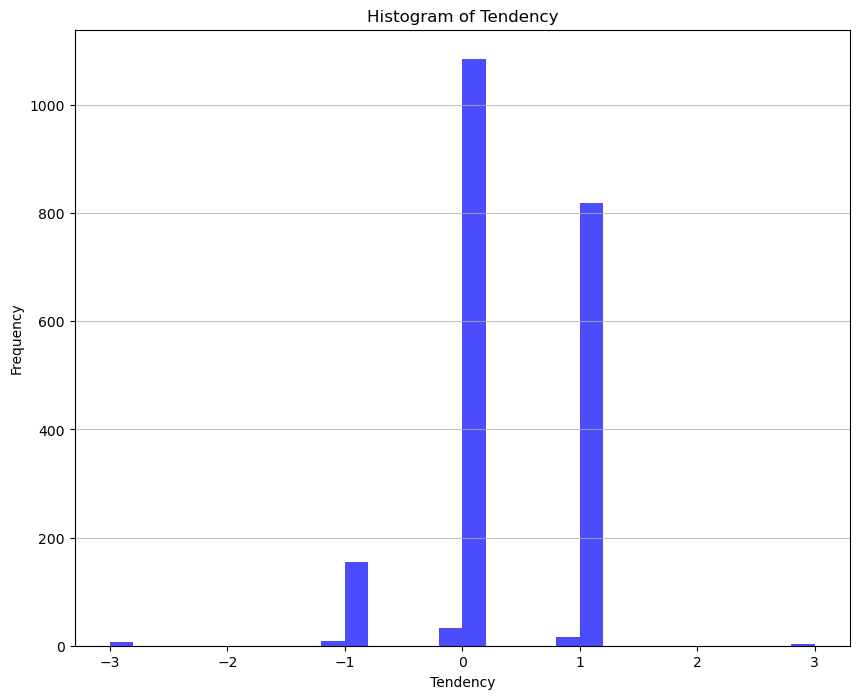

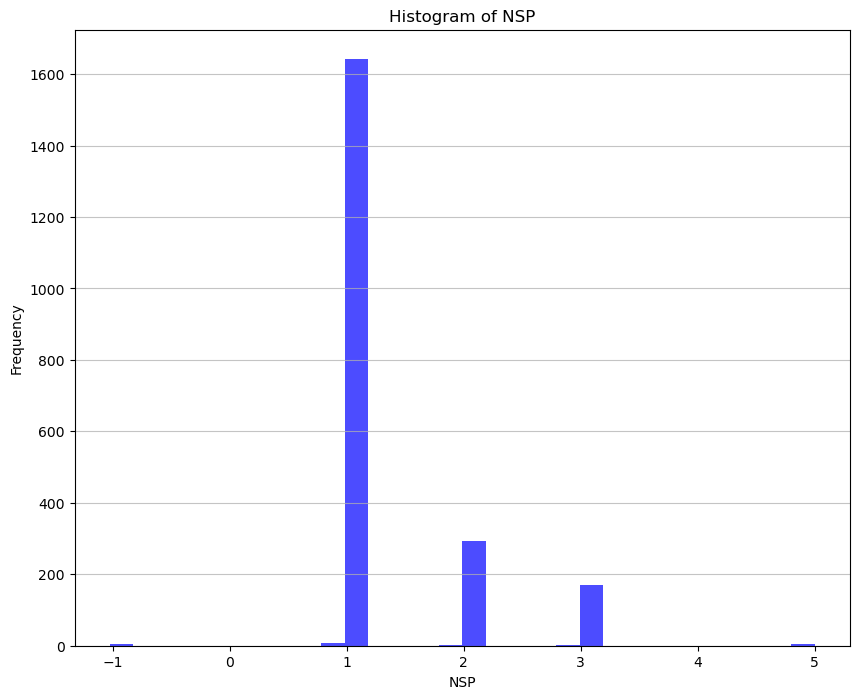

In [270]:
for col in df1:
    plt.figure(figsize=(10, 8))
    plt.hist(df1[col], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### 2. Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [299]:
categorical_cols=df1.select_dtypes(include=['O']).columns # o for object
categorical_cols

Index([], dtype='object')

## There are no categorical colums in the dataframe, so cant make barplots and piecharts.

### 3. Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

<Figure size 640x480 with 0 Axes>

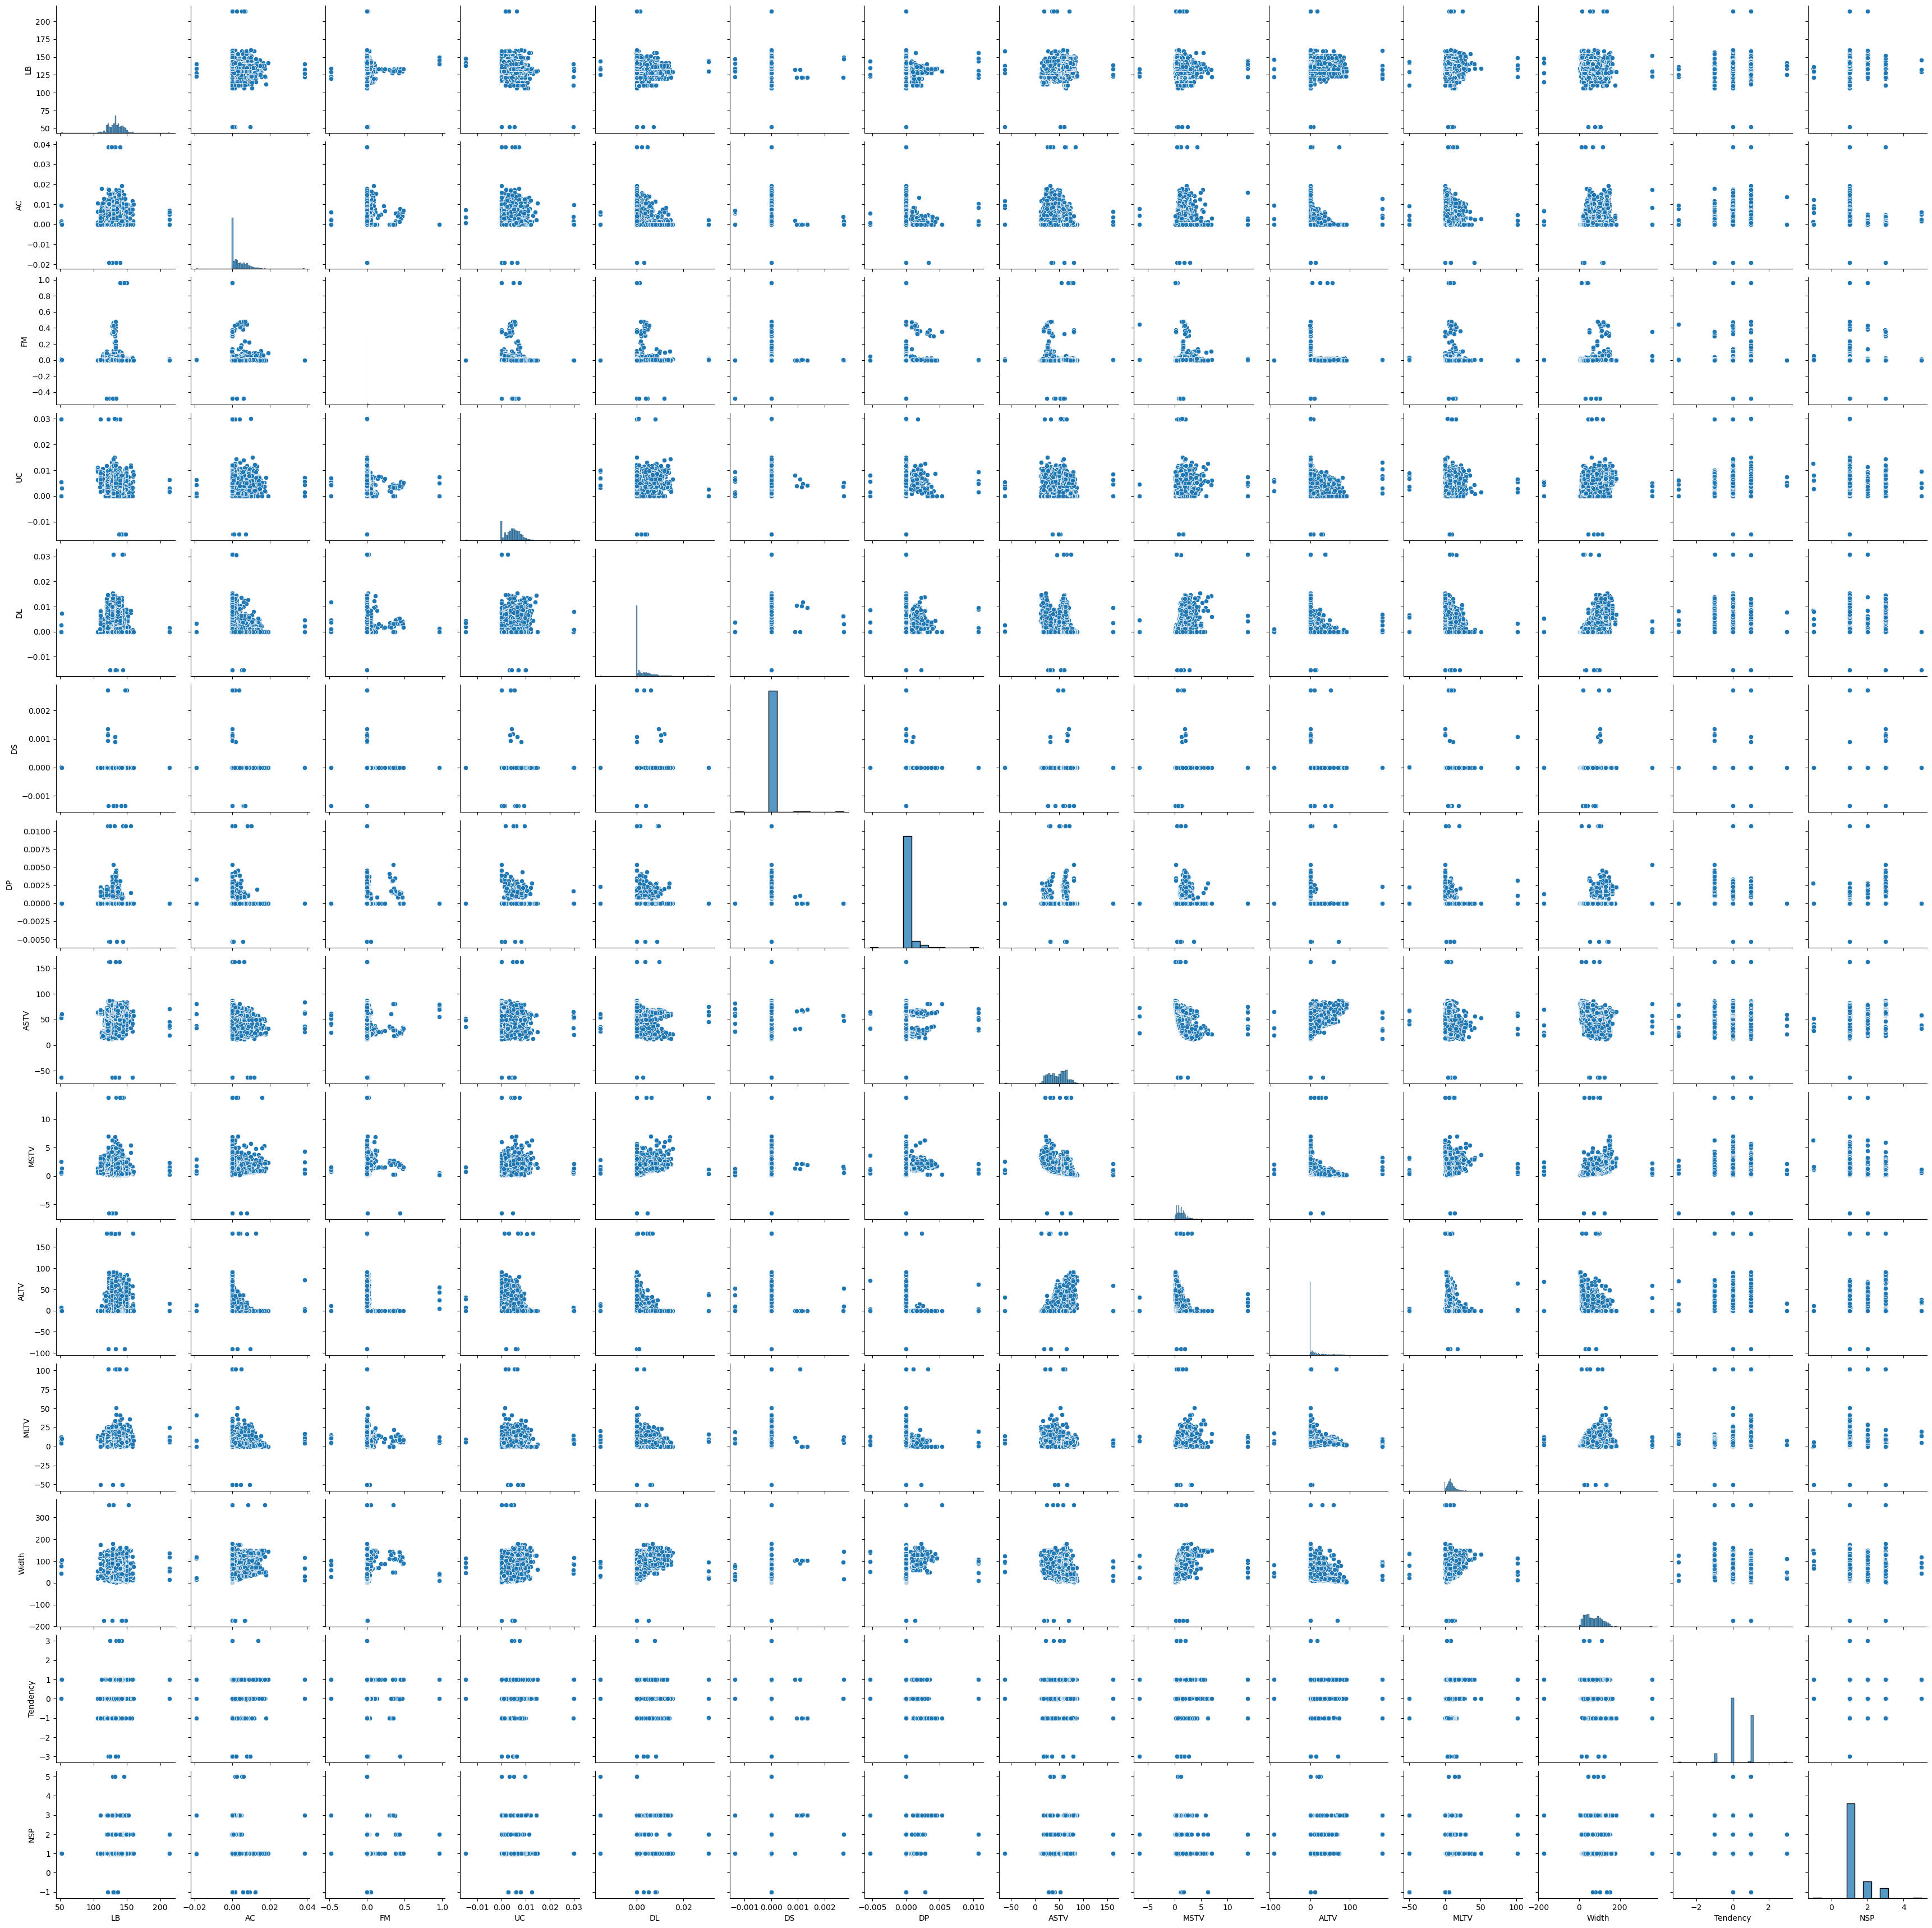

In [256]:
# Scatter plot or correlation heatmap

plt.figure()
sns.pairplot(df1)  # Pair plot for variable relationships
plt.show()

### 4.Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

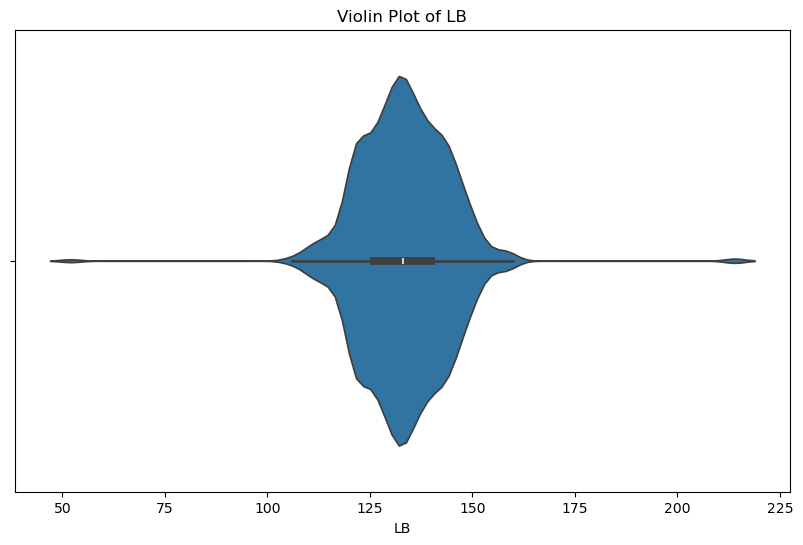

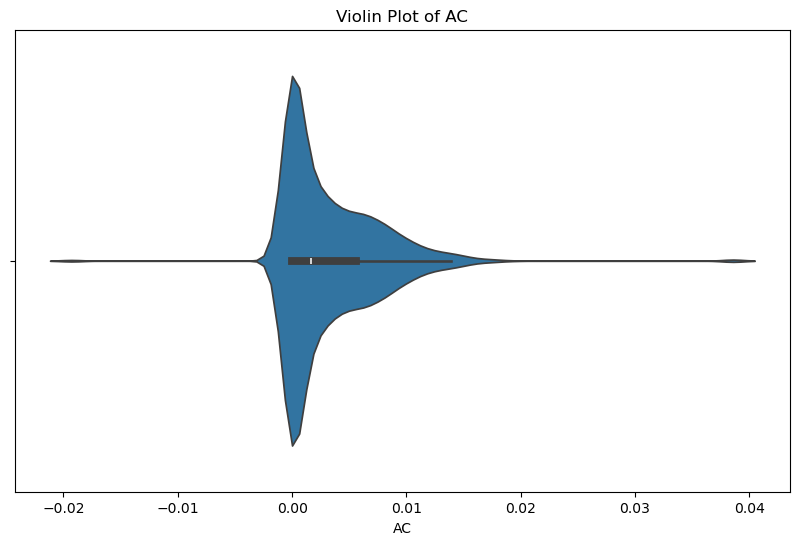

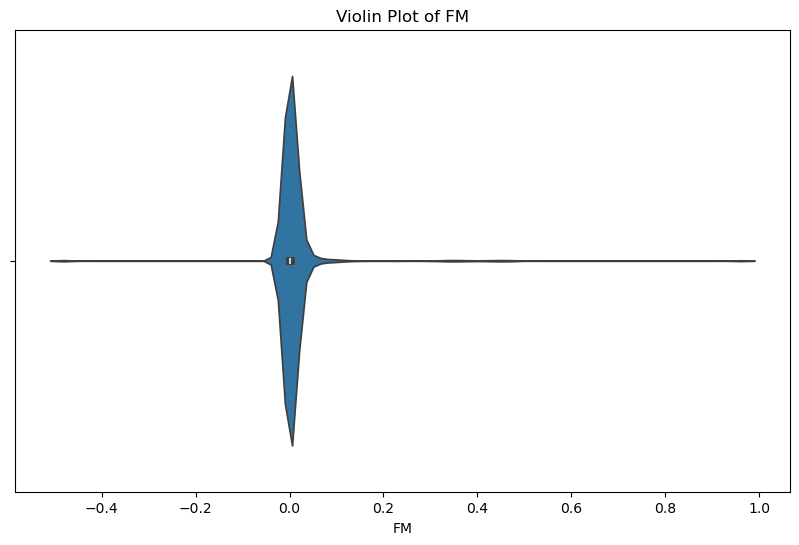

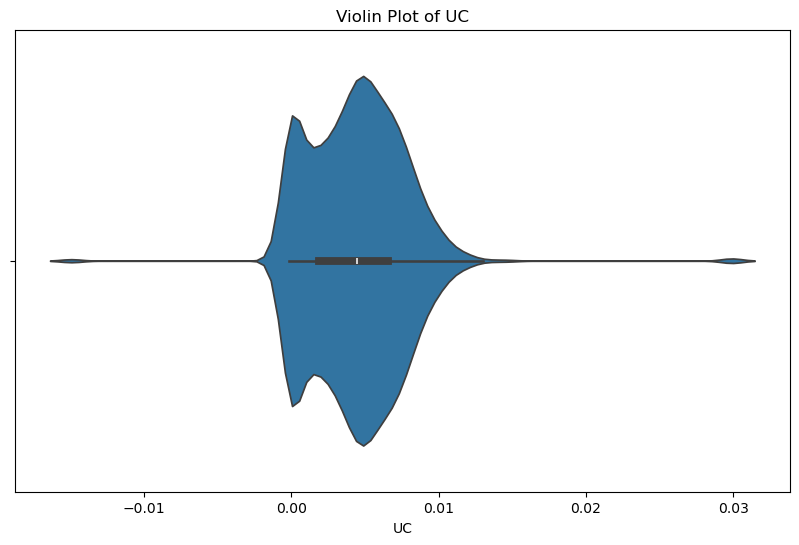

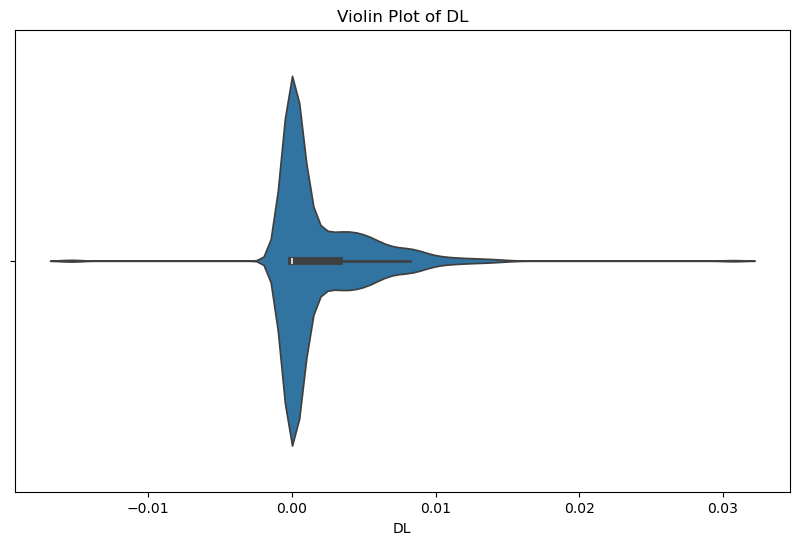

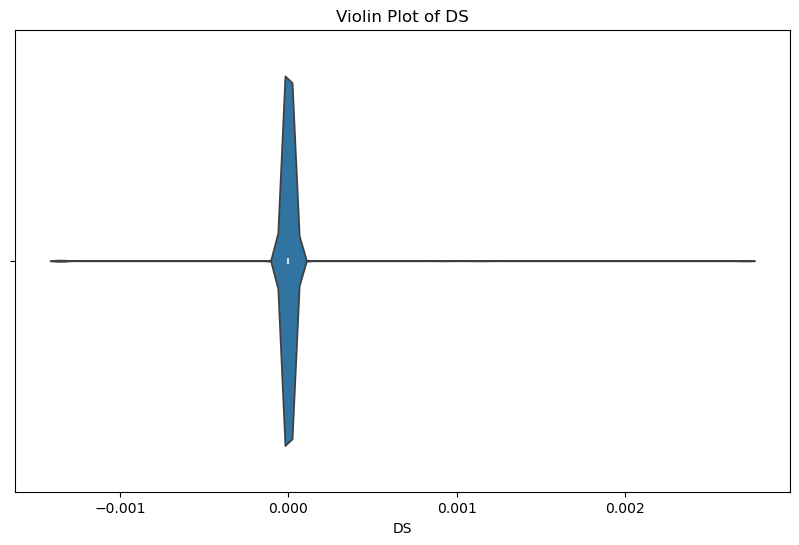

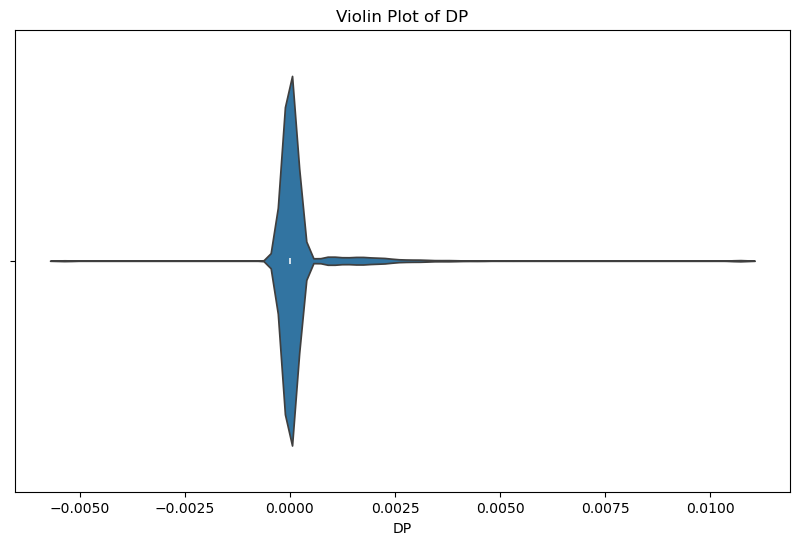

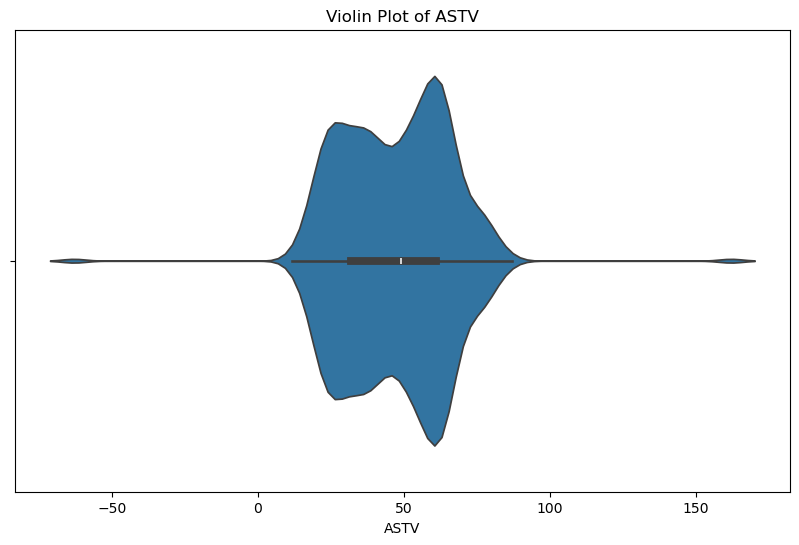

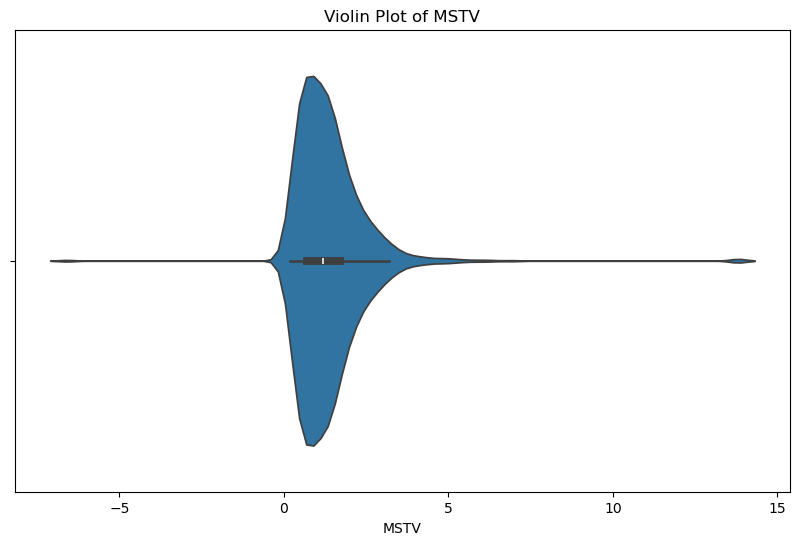

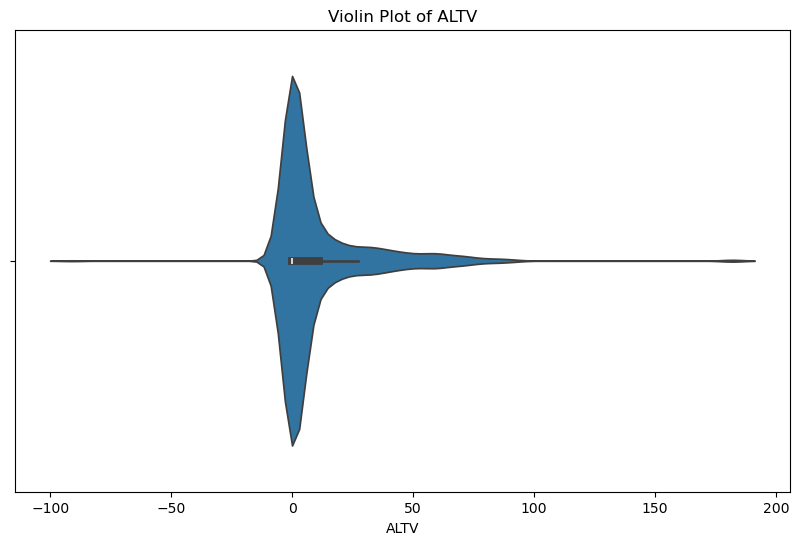

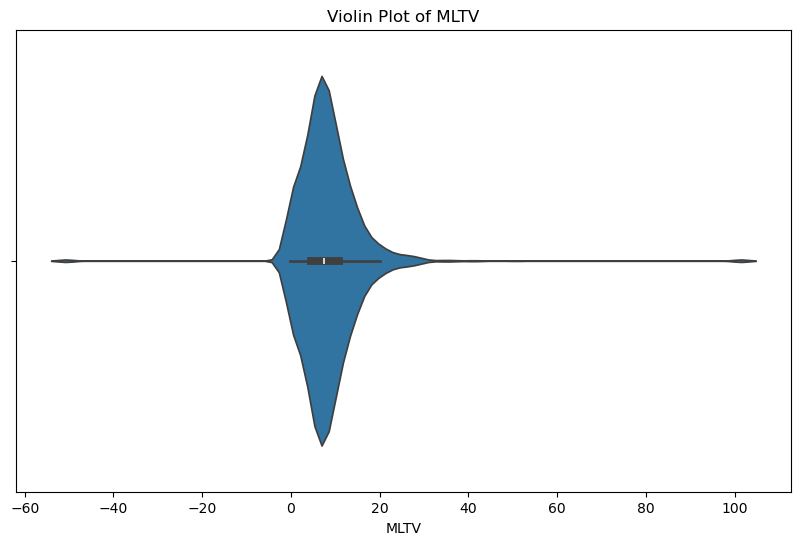

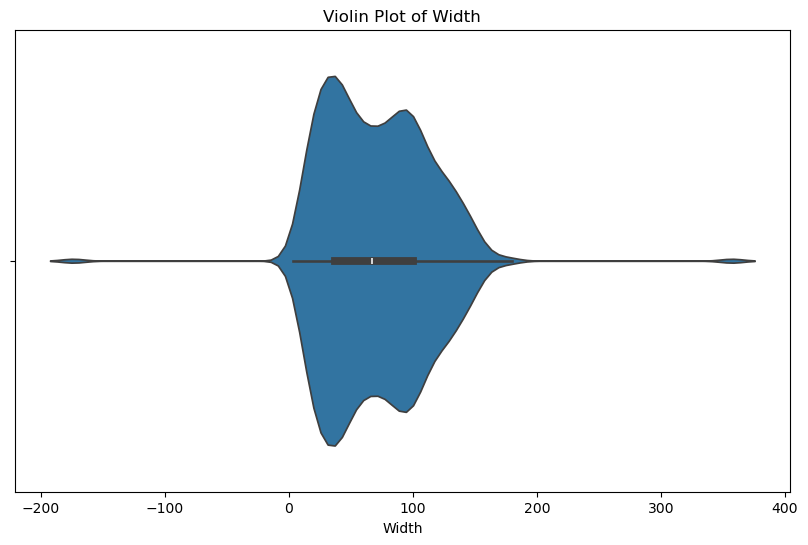

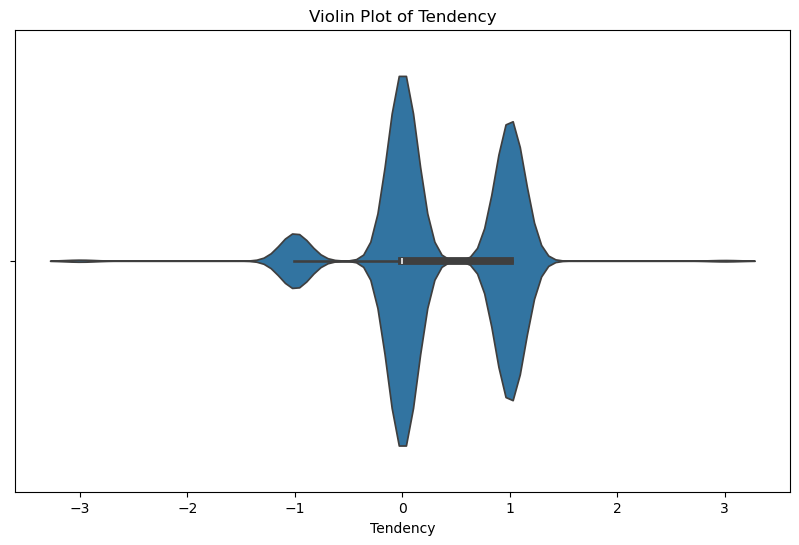

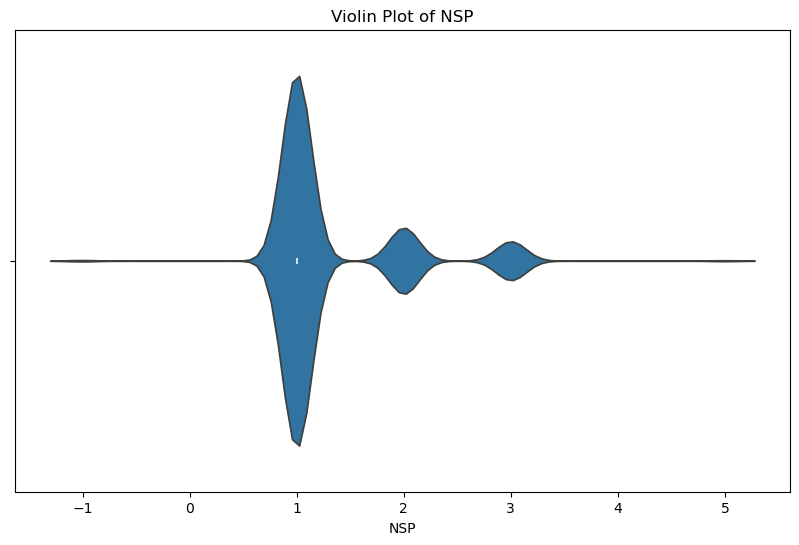

In [315]:
#Create violin plots for numerical variables
for col in df1:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df1[col])
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Pattern Recognition and Insights:

### 1.Identify any correlations between variables and discuss their potential implications.

In [320]:
df1.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [327]:
# Correlation Analysis
# Calculate the correlation matrix for numerical columns.

correlation_matrix=df1.corr()
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062813,0.018807,-0.166229,-0.126563,-0.005432,-0.047650,0.241857,-0.169647,0.210542,-0.003423,-0.118397,0.236730,0.131839
AC,-0.062813,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.230470,0.132962,-0.269807,-0.104853,0.234549,0.031710,-0.311689
FM,0.018807,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.032691,0.017055,-0.011936,-0.006121,0.097282,-0.017819,0.074446
UC,-0.166229,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.181161,0.189406,-0.227304,-0.049452,0.107083,-0.066832,-0.185229
DL,-0.126563,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.069361,0.410102,-0.186967,-0.165293,0.408578,-0.023914,0.024879
DS,-0.005432,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.008426,0.016026,-0.004335,0.034367,0.040845,-0.015294,0.065411
DP,-0.047650,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.038119,0.118628,-0.076975,-0.113818,0.175462,-0.129204,0.295057
ASTV,0.241857,-0.230470,-0.032691,-0.181161,-0.069361,0.008426,0.038119,1.000000,-0.293882,0.357497,-0.219709,-0.206931,-0.010855,0.420873
MSTV,-0.169647,0.132962,0.017055,0.189406,0.410102,0.016026,0.118628,-0.293882,1.000000,-0.291935,0.028452,0.432822,-0.038017,-0.095876
ALTV,0.210542,-0.269807,-0.011936,-0.227304,-0.186967,-0.004335,-0.076975,0.357497,-0.291935,1.000000,-0.107200,-0.345732,0.038234,0.366454


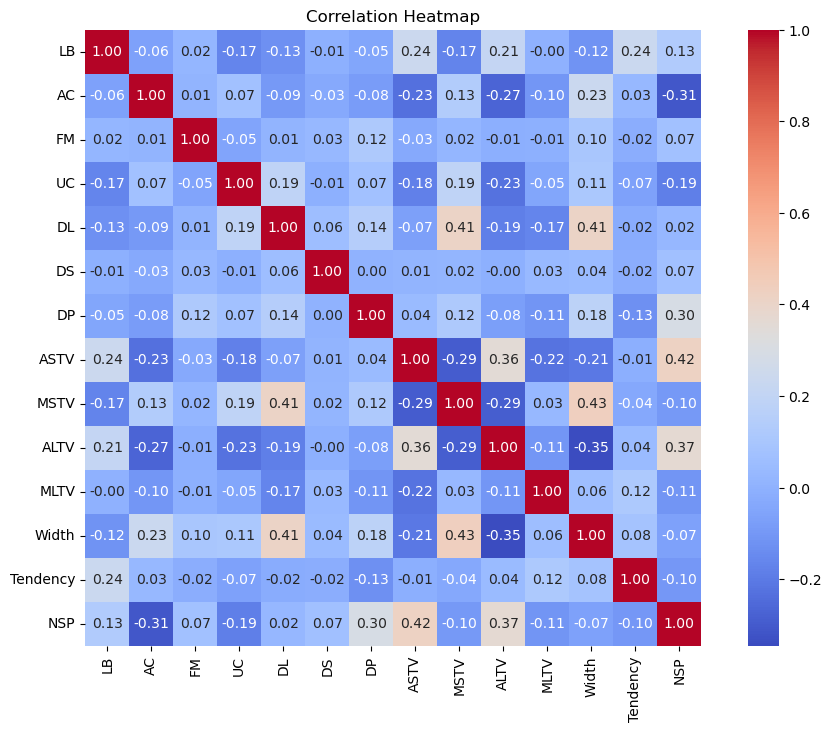

In [400]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws=None)
plt.title('Correlation Heatmap')
plt.show()

In [402]:
# Discussion of Correlations
# You can print or discuss the correlation values for insights

In [404]:
print("Discussion of Correlation Insights:\n")

# Iterate through the correlation matrix and find strong correlations
threshold = 0.5  # Set threshold for strong correlation
for col in correlation_matrix.columns:
    for index in range(len(correlation_matrix)):
        correlation_value = correlation_matrix.iloc[index][col]  # Use .iloc to access by position
        if correlation_value > threshold:
            print(f"{col} has a strong positive correlation with {correlation_matrix.columns[index]}: {correlation_value:.2f}")
        elif correlation_value < threshold:
            print(f"{col} has a strong negative correlation with {correlation_matrix.columns[index]}: {correlation_value:.2f}")

Discussion of Correlation Insights:

LB has a strong positive correlation with LB: 1.00
LB has a strong negative correlation with AC: -0.06
LB has a strong negative correlation with FM: 0.02
LB has a strong negative correlation with UC: -0.17
LB has a strong negative correlation with DL: -0.13
LB has a strong negative correlation with DS: -0.01
LB has a strong negative correlation with DP: -0.05
LB has a strong negative correlation with ASTV: 0.24
LB has a strong negative correlation with MSTV: -0.17
LB has a strong negative correlation with ALTV: 0.21
LB has a strong negative correlation with MLTV: -0.00
LB has a strong negative correlation with Width: -0.12
LB has a strong negative correlation with Tendency: 0.24
LB has a strong negative correlation with NSP: 0.13
AC has a strong negative correlation with LB: -0.06
AC has a strong positive correlation with AC: 1.00
AC has a strong negative correlation with FM: 0.01
AC has a strong negative correlation with UC: 0.07
AC has a strong ne

### 2.Look for trends or patterns over time if temporal data is available.

In [383]:
# Step 2: Temporal Analysis

In [387]:
print("Dataset Info:")
print(df1.info())
print("\nFirst few rows of the dataset:")
print(df1.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None

First few rows of the dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  

In [389]:
# we dont see any temporal data available

# Conclusion:

In [ ]:
#Summary of Key Insights
#Correlation Insights:
#The correlation analysis revealed several strong relationships between variables.

In [ ]:
# Distribution Patterns:
#The histograms and box plots indicated that is right-skewed, suggesting that most observations are concentrated at lower values with a few higher outliers

In [ ]:
# Also, the presence of outliers noted, which may require further treatment, as they could significantly impact any predictive models developed late

In [ ]:
# Temporal Trends:
# If temporal data was available, time series analysis could reveal trends over time, such as increasing or decreasing patterns in certain variables.